In [1]:
# import libraies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop


In [2]:
# loading dateset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [19]:
def check_size():
    # check the number of train images
    train_images.shape
    # check the number of test images
    test_images.shape


In [17]:
# constructing the model
model = tf.keras.models.Sequential([
    # create convolution kernel
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                           input_shape=(32, 32, 3)),
    # create maxpooling layer
    tf.keras.layers.MaxPooling2D(2, 2),
    # repeating process
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # flatten the tensor to 1d
    tf.keras.layers.Flatten(),
    # the second layer
    tf.keras.layers.Dense(128, activation='relu'),
    # the final layer, since we have multiple classes, we use softmax instead of simoid
    tf.keras.layers.Dense(10, activation='softmax')
])
# check if the model is constructed correctly
model.summary()
# compiling the model
model.compile(loss=tf.losses.sparse_categorical_crossentropy,
              optimizer='Adam', metrics=['acc'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 2, 2, 64)        

In [18]:
# start training
history = model.fit(
    # normalizing the images by /255
    train_images/255,
    train_labels,
    epochs=10,
    validation_data=(test_images/255, test_labels)
)


Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5477 - acc: 0.4316 - val_loss: 1.2697 - val_acc: 0.5463
Epoch 2/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1959 - acc: 0.5732 - val_loss: 1.1552 - val_acc: 0.5966
Epoch 3/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0566 - acc: 0.6289 - val_loss: 1.0270 - val_acc: 0.6388
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9618 - acc: 0.6623 - val_loss: 0.9926 - val_acc: 0.6550
Epoch 5/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8950 - acc: 0.6852 - val_loss: 0.9413 - val_acc: 0.6773
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.8433 - acc: 0.7018 - val_loss: 0.9296 - val_acc: 0.6763
Epoch 7/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7941 - acc: 0.7205 - val_loss: 0.9205 - val_acc: 0.6870
Epoch 8/10
1563/1563 [==========================

In [21]:
# start classifying
def classify():
    # the different classes
    name = ["airplane", "automobile", "bird", "cat",
            "deer", "dog", "frog", "horse", "ship", "truck"]
    # getting the image path the user wants to classify
    file_path = input("Enter the path for the image you want to classify:")
    img = image.load_img(file_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=20)
    # print the result
    print("It's a "+name[np.argmax(classes[0])]+".")


classify()


It's a airplane.


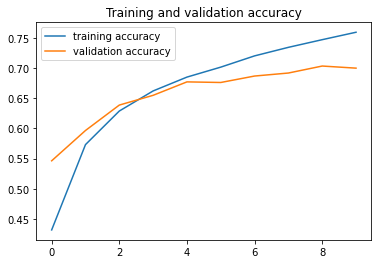

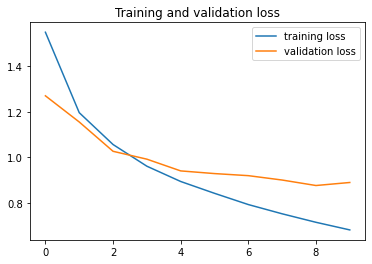

In [22]:
# drawing the graph
def plot():
    # getting the accuacy value
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    # getting the loss value
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))
    # plotting the graph
    plt.plot(epochs, acc, label='training accuracy')
    plt.plot(epochs, val_acc, label='validation accuracy')
    plt.legend()
    plt.title('Training and validation accuracy')

    plt.figure()

    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.legend()
    plt.title('Training and validation loss')


plot()
